In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


In [31]:
data = yf.download('DELTACORP.NS', start='2021-05-23', end='2023-05-23',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-24,164.699997,176.800003,161.350006,175.350006,173.264389,12088385
2021-05-25,177.000000,178.899994,171.550003,175.000000,172.918549,6011684
2021-05-26,175.899994,182.000000,174.199997,176.050003,173.956070,5094891
2021-05-27,175.199997,176.300003,172.500000,173.850006,171.782227,2075651
2021-05-28,175.250000,176.000000,170.850006,171.699997,169.657776,1997272
...,...,...,...,...,...,...
2023-05-16,224.949997,230.449997,223.050003,227.000000,227.000000,3963511
2023-05-17,227.800003,229.750000,221.699997,226.199997,226.199997,2096869
2023-05-18,227.000000,227.500000,219.449997,222.050003,222.050003,1678665


In [32]:
def sma(period,series):
    sma_points=[]
    for i in range(0,len(series)-period+1):        
        sum_value= series[i:i+period].sum()
        mean = sum_value/period
        sma_points.append(mean)
    return sma_points
#EMA(Today)= Price(Today)*k +EMA(Yesterday)*(1-k)
def ema(period,series):
    sf=2/(period+1)
    ema_points=[]
    ema_points.append((series[0])*sf + sma(period,series)[0]*(1-sf))
    ema_temp = (series[0])*sf + sma(period,series)[0]*(1-sf)
    for i in range(1,len(series)):
        ema_val = series[i]*sf + ema_temp*(1-sf)
        ema_temp = ema_val
        ema_points.append(ema_val)
    return (ema_points)


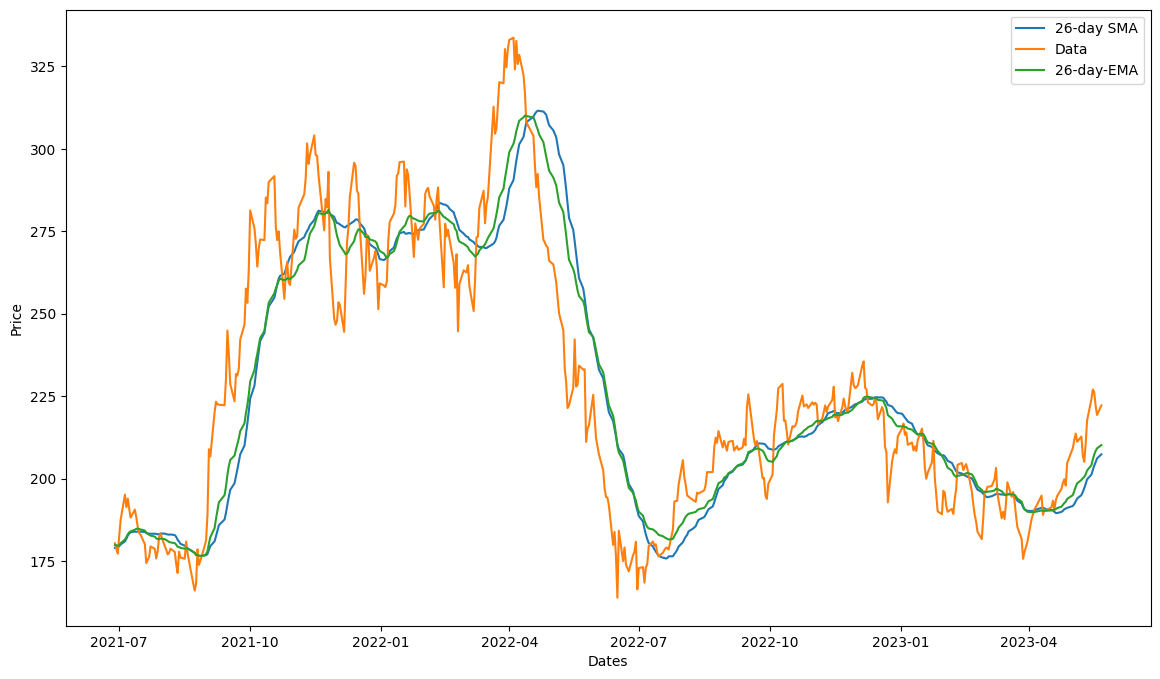

In [33]:
#26 DAY EMA
plt.figure(figsize=(14, 8))
plt.plot(data.index[25:],sma(26,data['Close']))
plt.plot(data.index[25:],data['Close'].iloc[25:])
plt.plot(data.index[25:],ema(26,data['Close'])[25:])

plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best', labels=['26-day SMA','Data','26-day-EMA'])

plt.show()


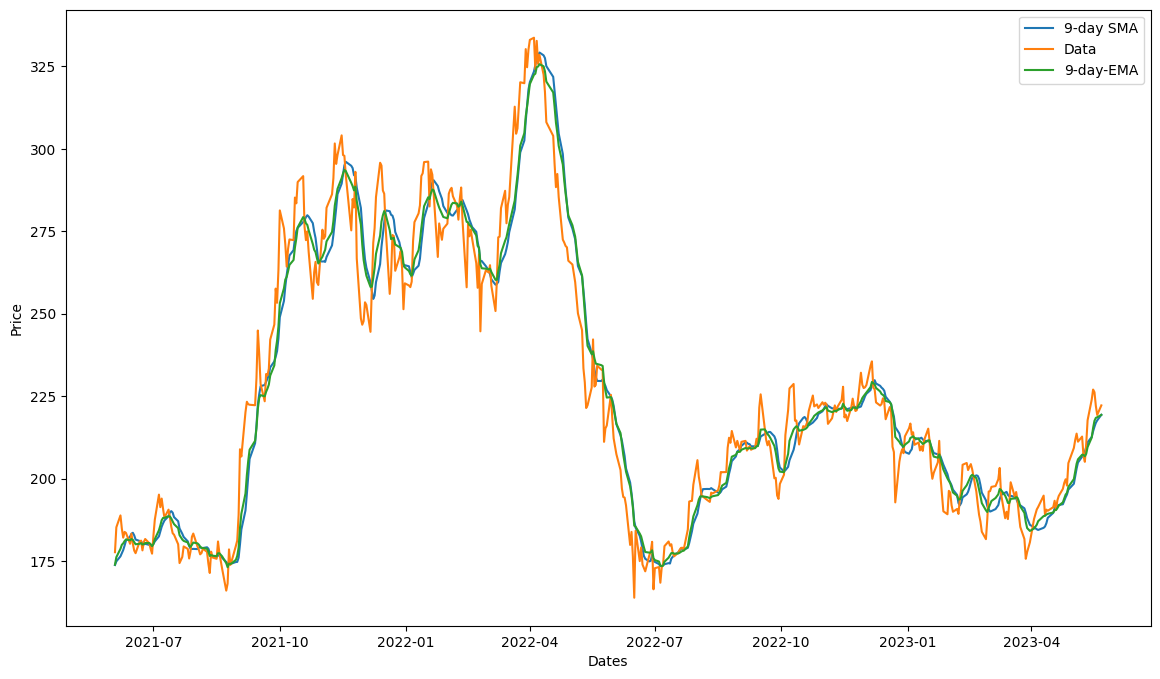

In [34]:
plt.figure(figsize=(14, 8))
plt.plot(data.index[8:],sma(9,data['Close']))
plt.plot(data.index[8:],data['Close'].iloc[8:])
plt.plot(data.index[8:],ema(9,data['Close'])[8:])

plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best', labels=['9-day SMA','Data','9-day-EMA'])

plt.show()

In [35]:
macd=[element1 - element2 for (element1, element2) in zip(ema(9,data['Close']), ema(26,data['Close']))]
macd = np.array(macd)


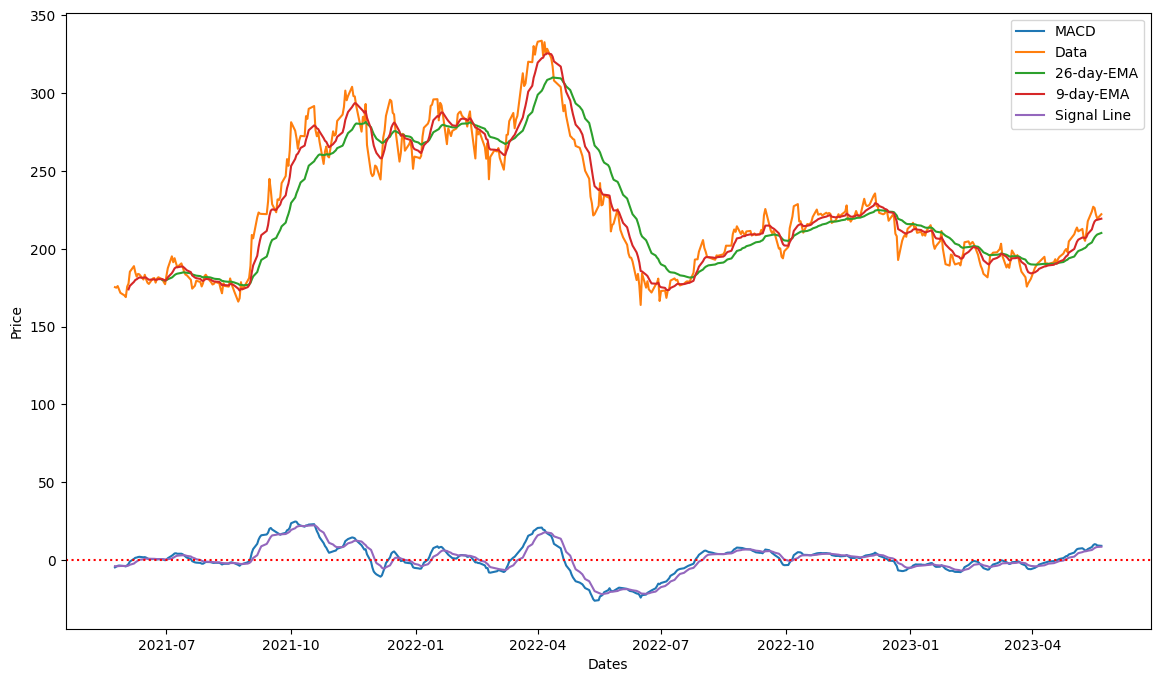

In [36]:
plt.figure(figsize=(14, 8))
plt.plot(data.index,macd)
plt.plot(data.index,data['Close'])
plt.plot(data.index[25:],ema(26,data['Close'])[25:])
plt.plot(data.index[8:],ema(9,data['Close'])[8:])
plt.plot(data.index,ema(9,macd))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best', labels=['MACD','Data','26-day-EMA','9-day-EMA','Signal Line'])
plt.axhline(0, color='red', linestyle='dotted')
plt.show()

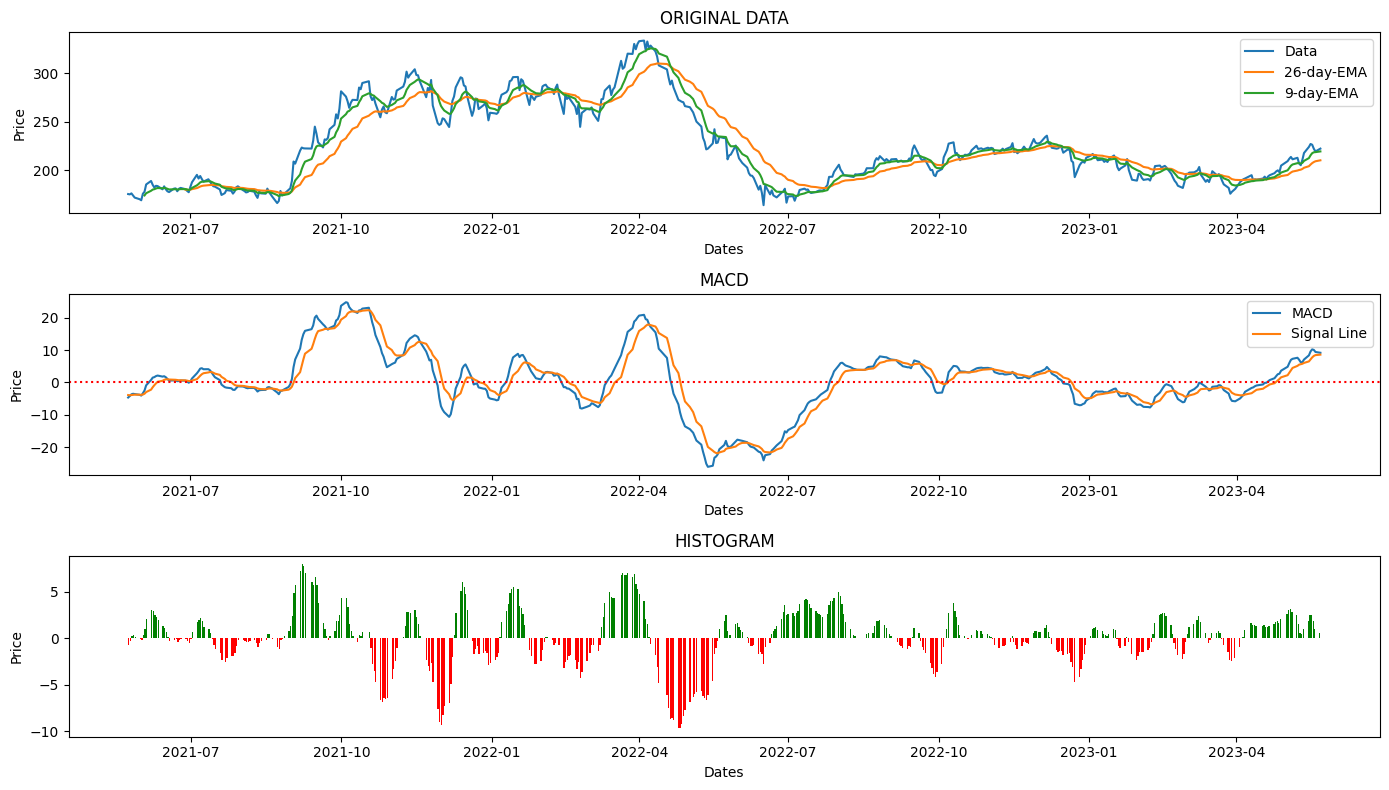

In [37]:
#original data
plt.figure(figsize=(14, 8))
plt.subplot(3 , 1 ,1)
plt.title('ORIGINAL DATA')
plt.plot(data.index,data['Close'])
plt.plot(data.index[25:],ema(26,data['Close'])[25:])
plt.plot(data.index[8:],ema(9,data['Close'])[8:])
plt.legend(loc='best', labels=['Data','26-day-EMA','9-day-EMA'])
plt.xlabel('Dates')
plt.ylabel('Price')
#macd and signal line
plt.subplot(3,1,2)
plt.title('MACD')
plt.plot(data.index,macd)
plt.plot(data.index,ema(9,macd))
plt.axhline(0, color='red', linestyle='dotted')
plt.legend(loc='best', labels=['MACD','Signal Line'])
plt.xlabel('Dates')
plt.ylabel('Price')
#histograph
diff = np.array(macd) - np.array(ema(9,macd))
colors = ['red' if d < 0 else 'green' for d in diff]
plt.subplot(3,1,3)
plt.bar(data.index,np.array(macd)-np.array(ema(9,macd)),color=colors)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('HISTOGRAM')
plt.tight_layout()